In [1]:
import numpy as np

import scipy.stats as sp

import matplotlib.pyplot as plt

Let $\lambda_i = i/100$ for $i=1,2,\ldots,n$.
Now let the random variables $x_i \sim \mathrm{Poisson}(\lambda_i)$ be drawn from Poisson distributions with rate parameters $\lambda_i$. Finally, let the random variable $z=\frac{1}{n}\sum_{i=0}^{n-1}x_i$.

In [2]:
n, trials = 100, 10000

lambdas = np.arange(n)/n

x = np.array([sp.poisson(l).rvs(size=trials) for l in lambdas])

z = np.sum(x, axis=0)/n

The Central Limit Theorem states that $z\sim\mathcal{N}(\mu=\frac{1}{n}\sum_{i}\lambda_i, \sigma^2=\frac{1}{n^2}\sum_{i}\lambda_i)$ as $n\rightarrow\infty$. (Here we have used the fact that the mean and variance of a Poisson distribution are both equal to the rate parameter $\lambda$.)

Let's check this for $n=100$ by examining the distribution of $10^4$ trail realisations of $z$.

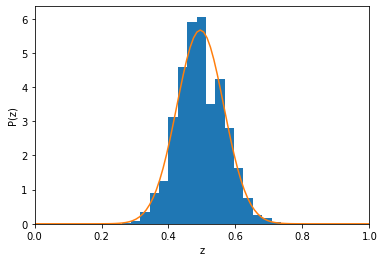

In [3]:
plt.hist(z, bins=20, density=True)

mu, sigmasq = np.sum(lambdas)/n, np.sqrt(np.sum(lambdas)/n**2)
CLTdist = sp.norm(mu, sigmasq)

x = np.linspace(0, 1, 100)
plt.plot(x, CLTdist.pdf(x))

plt.xlim(0,1)

plt.xlabel("z")
plt.ylabel("P(z)")

plt.show()